In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
pd.options.display.float_format = '{:,.4f}'.format
pd.set_option("display.max_columns", None)

In [3]:
train_data = pd.read_csv("../dataset/train.csv")
test_data = pd.read_csv("../dataset/test.csv")
train_helper_data = pd.read_csv("../dataset/train_helper.csv")
test_helper_data = pd.read_csv("../dataset/test_helper.csv")


In [4]:
train_data.shape, test_data.shape, train_helper_data.shape, test_helper_data.shape

((233633, 14), (215852, 13), (1231200, 10), (1160950, 10))

In [5]:
train_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,Target,V13
0,CUID1872,TID229526,EID2062082,485.6945,2020-03-20 22:51:30,376474,A,BA1,BB425559,PD44707,CC1,CP0,0,2020-03-21 00:00:00
1,CUID5533,TID244499,EID1459012,393.4520,2020-04-28 07:17:12,33227,A,BA4793,BB248012,PD39453,CC1,CP0,0,2020-04-28 00:00:00
2,CUID5278,TID311877,EID0,375.7500,2020-08-15 04:11:43,0,F,BA5631,BB166256,PD237664,CC1,CP0,0,NaN
3,CUID24,TID279685,EID0,6.9722,2020-06-26 01:11:42,0,C,BA7188,BB354924,PD99032,CC1,CP0,0,NaN
4,CUID449,TID104689,EID0,16.7000,2020-09-15 10:11:06,0,C,BA7236,BB354924,PD63422,CC1,CP0,0,NaN


In [6]:
test_data["V1"].nunique(), train_data["V1"].nunique(), train_helper_data["V1"].nunique(), test_helper_data["V1"].nunique()

(3673, 3684, 3671, 3662)

In [7]:
test_data["V3"].nunique(), train_data["V3"].nunique(), train_helper_data["V3"].nunique(), test_helper_data["V3"].nunique()

(190420, 206627, 856277, 812456)

In [8]:
train_helper_data_grouped = train_helper_data.groupby(["V1"]).agg(list)

In [9]:
train_helper_data_grouped = train_helper_data_grouped.reset_index()

In [10]:
train_helper_data_grouped["V3"] = train_helper_data_grouped["V3"].apply(lambda x: st.mode(x)[0][0])

In [11]:
train_helper_data.head()

,V1,V3,V14,V15,V16,V17,V18,V19,V20,V21
0,CUID1626,EID1390067,B170291,A,2017-11-18 05:26:58,117.167.140.162,875,1525792,77.5500,NaN
1,CUID2932,EID397864,B170291,A,2017-11-18 05:26:59,133.193.46.52,875,471293,-25.8500,NaN
2,CUID7230,EID315534,B1827073,B,2017-11-18 05:27:02,127.75.140.137,875,825535,NaN,373.5000
3,CUID1588,EID1724187,B170291,A,2017-11-18 05:27:30,120.210.191.123,875,2136427,-23.5000,NaN
4,CUID3625,EID637357,B2356022,B,2017-11-18 05:27:55,127.75.145.110,875,825535,169.2000,400.0600


In [12]:
train_helper_data_grouped.head()

,V1,V3,V14,V15,V16,V17,V18,V19,V20,V21
0,CUID1,EID493935,"[B170291, B170291, B2226330, B170291, B170291,...","[A, A, B, A, A, A, B, A, B, B, B, B, B, B, B, ...","[2017-12-17 02:20:50, 2017-12-17 02:33:33, 201...","[168.160.152.200, 168.160.152.200, 168.160.152...","[875, 875, 875, 875, 875, 875, 875, 875, 875, ...","[498795, 498795, 498795, 498795, 1777813, 1777...","[129.25, 129.25, nan, 122.2, 169.2000000000000...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
1,CUID10,EID762550,"[B170291, B170291, B1785853, B170291, B1827073...","[A, A, B, A, B, A, A, A, B, A, A, A, A, B, B, ...","[2017-11-19 02:49:21, 2017-11-19 05:40:08, 201...","[112.134.54.143, 112.134.54.143, 112.134.54.14...","[875, 875, 875, 875, 875, 875, 875, 875, 875, ...","[1777813, 1777813, 1777813, 1777813, 1777813, ...","[145.70000000000002, 145.70000000000002, nan, ...","[nan, nan, nan, nan, 185.92, nan, nan, nan, na..."
2,CUID100,EID1663139,"[B170291, B170291, B170291, B170291, B170291, ...","[A, A, A, A, A, B, A, A, A, A, A, A, A, A, A, ...","[2017-12-16 20:32:19, 2017-12-17 22:56:39, 201...","[140.104.180.53, 140.104.180.141, 120.210.189....","[875, 875, 875, 875, 875, 875, 875, 875, 875, ...","[2136427, 2136427, 2136427, 2136427, 2136427, ...","[117.5, 112.8, 117.5, 117.5, 117.5, nan, 117.5...","[nan, nan, nan, nan, nan, 29.05, nan, nan, nan..."
3,CUID1000,EID223654,"[B170291, B123131, B170291, B2223271, B769, B7...","[A, D, A, B, C, C, C, C, A, A, C, C, C, C, A, ...","[2017-12-29 05:18:38, 2017-12-29 05:19:17, 201...","[113.178.166.111, 113.178.166.111, 113.178.166...","[875, 875, 875, 875, 875, 875, 875, 875, 875, ...","[809725, 809725, 809725, 809725, 809725, 80972...","[-11.75, -11.75, 32.9, nan, nan, nan, nan, nan...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
4,CUID1003,EID401592,"[B170291, B170291, B170291, B170291, B170291, ...","[A, A, A, A, A, A, B, B, A, C, A, A, A]","[2017-12-17 11:33:33, 2018-01-01 06:55:44, 201...","[86.42.118.130, 86.42.118.92, 86.42.118.92, 86...","[875, 875, 875, 875, 875, 875, 875, 875, 875, ...","[33514, 33514, 33514, 33514, 33514, 1525792, 1...","[110.45, 94.0, 96.35, 117.5, 129.25, 112.8, na...","[nan, nan, nan, nan, nan, nan, nan, 4.98, nan,..."


In [15]:
train_helper_data_grouped["V14"] = train_helper_data_grouped["V14"].apply(lambda x: st.mode(x)[0][0])
train_helper_data_grouped["V15"] = train_helper_data_grouped["V15"].apply(lambda x: st.mode(x)[0][0])
train_helper_data_grouped["V16"] = train_helper_data_grouped["V16"].apply(lambda x: st.mode(x)[0][0])
train_helper_data_grouped["V17"] = train_helper_data_grouped["V17"].apply(lambda x: st.mode(x)[0][0])
train_helper_data_grouped["V18"] = train_helper_data_grouped["V18"].apply(lambda x: st.mode(x)[0][0])
train_helper_data_grouped["V19"] = train_helper_data_grouped["V19"].apply(lambda x: np.median(x))
train_helper_data_grouped["V20"] = train_helper_data_grouped["V18"].apply(lambda x: np.mean(x))
train_helper_data_grouped["V21"] = train_helper_data_grouped["V21"].apply(lambda x: np.mean(x))

In [16]:
def identify_datatype(data):
    # Identify the data types of each column
    for column in data.columns:
        values = data[column].unique()
        data_type = None
        if all(isinstance(value, int) for value in values):
            data_type = 'integer'
        elif all(isinstance(value, float) for value in values):
            data_type = 'float'
        elif all(isinstance(value, str) for value in values):
            data_type = 'string'
        elif all(isinstance(value, bool) for value in values):
            data_type = 'boolean'
        print(f'{column}: {data_type}')


In [17]:
identify_datatype(train_data)

V1: string
V2: string
V3: string
V4: float
V5: string
V6: None
V7: string
V8: string
V9: string
V10: string
V11: string
V12: string
Target: None
V13: None


In [18]:
identify_datatype(train_helper_data)

V1: string
V3: string
V14: string
V15: string
V16: string
V17: string
V18: None
V19: None
V20: float
V21: float


<AxesSubplot:xlabel='V21', ylabel='Count'>

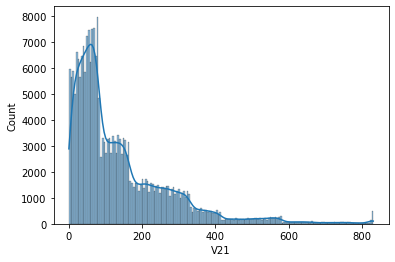

In [19]:
sns.histplot(data=train_helper_data, x="V21",  kde=True)

<AxesSubplot:xlabel='V21'>

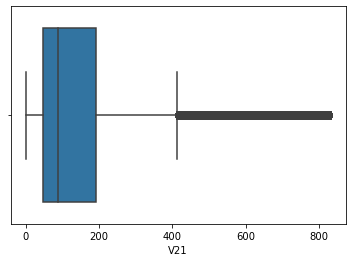

In [20]:
sns.boxplot(data=train_helper_data, x="V21")

### impute missing values

In [21]:
V20_median = train_helper_data["V20"].median()

In [22]:
V21_median = train_helper_data["V21"].median()

In [23]:
train_helper_data["V20"].fillna(V20_median, inplace=True)

In [24]:
train_helper_data["V21"].fillna(V21_median, inplace=True)

In [25]:
train_data[train_data["V13"].isna()]["Target"].value_counts()

0    1870
1       1
Name: Target, dtype: int64

In [26]:
train_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,Target,V13
0,CUID1872,TID229526,EID2062082,485.6945,2020-03-20 22:51:30,376474,A,BA1,BB425559,PD44707,CC1,CP0,0,2020-03-21 00:00:00
1,CUID5533,TID244499,EID1459012,393.4520,2020-04-28 07:17:12,33227,A,BA4793,BB248012,PD39453,CC1,CP0,0,2020-04-28 00:00:00
2,CUID5278,TID311877,EID0,375.7500,2020-08-15 04:11:43,0,F,BA5631,BB166256,PD237664,CC1,CP0,0,NaN
3,CUID24,TID279685,EID0,6.9722,2020-06-26 01:11:42,0,C,BA7188,BB354924,PD99032,CC1,CP0,0,NaN
4,CUID449,TID104689,EID0,16.7000,2020-09-15 10:11:06,0,C,BA7236,BB354924,PD63422,CC1,CP0,0,NaN


### checking if the colun is categorical or continous

In [27]:
train_data["V4"].describe()

count   233,633.0000
mean        266.3604
std       1,338.6572
min           0.0083
25%          12.5250
50%          33.4000
75%         115.2300
max      41,750.0000
Name: V4, dtype: float64

In [28]:
train_data["V6"].describe()

count   233,633.0000
mean    103,071.4633
std     143,360.5982
min           0.0000
25%      33,227.0000
50%      33,227.0000
75%      33,227.0000
max     447,246.0000
Name: V6, dtype: float64

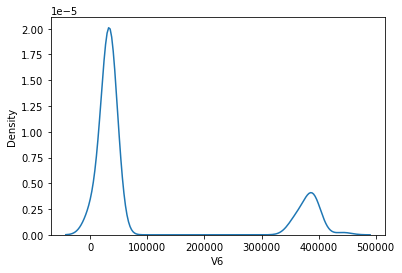

In [29]:
sns.kdeplot(train_data["V6"], bw_method=0.1)
plt.show()

In [30]:
train_data["V7"].value_counts(dropna=False)

A    228596
B      3043
C       894
E       574
D       348
F       178
Name: V7, dtype: int64

In [31]:
train_data["V9"].value_counts(dropna=False)

BB3336      26028
BB322619    10956
BB113702     9822
BB52590      7207
BB393658     6259
            ...  
BB131860        1
BB164399        1
BB436801        1
BB444620        1
BB446860        1
Name: V9, Length: 5765, dtype: int64

In [32]:
train_data["V10"].value_counts(dropna=False)

PD254442    3547
PD263612    3134
PD127776    3028
PD166130    2500
PD245022    2366
            ... 
PD380100       1
PD381638       1
PD189073       1
PD189074       1
PD376034       1
Name: V10, Length: 40909, dtype: int64

In [33]:
train_data["V12"].value_counts(dropna=False)

CP176843    3467
CP64891     2561
CP0         2363
CP188302    1458
CP80128     1310
            ... 
CP138180       1
CP205810       1
CP238693       1
CP120315       1
CP185890       1
Name: V12, Length: 4075, dtype: int64

In [34]:
train_helper_data["V15"].value_counts(dropna=False)

A    840102
B    365666
C     23150
D      1205
E       411
F       199
G       158
H       124
J        88
I        80
K        17
Name: V15, dtype: int64

In [35]:
train_helper_data["V18"].value_counts(dropna=False)

875    1157806
889      14927
429      13512
0         8822
691       3597
        ...   
133          1
324          1
695          1
69           1
433          1
Name: V18, Length: 137, dtype: int64

In [36]:
train_helper_data["V19"].describe()

count   1,231,200.0000
mean    1,068,001.4498
std       687,473.2684
min             0.0000
25%       498,795.0000
50%     1,058,753.0000
75%     1,777,813.0000
max     2,391,210.0000
Name: V19, dtype: float64

In [37]:
train_helper_data["V20"].describe()

count   1,231,200.0000
mean           77.7212
std            44.6210
min          -235.0000
25%            58.7500
50%            79.9000
75%            94.0000
max           235.0000
Name: V20, dtype: float64

#### checking if V6 has a relationship with target

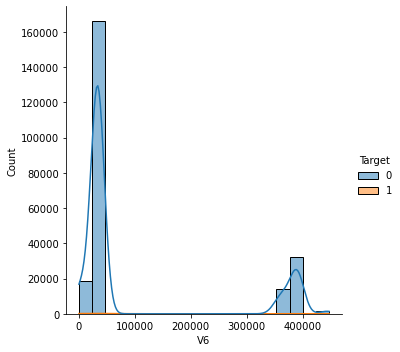

In [38]:
sns.displot(data=train_data, x='V6', hue='Target', kde=True)

In [39]:
from scipy.stats import ttest_ind
from scipy.stats import shapiro, anderson, levene, f_oneway, mannwhitneyu


In [40]:
group1 = train_data.loc[train_data['Target'] == 0, 'V6']
group2 = train_data.loc[train_data['Target'] == 1, 'V6']


In [41]:

# assume the two groups are stored in variables group1 and group2

# Normality test
stat1, p1 = shapiro(group1)
stat2, p2 = shapiro(group2)
if p1 > 0.05 and p2 > 0.05:
    print("Both groups have a normal distribution.")
else:
    print("At least one group does not have a normal distribution.")

# Equal variance test
stat, p = levene(group1, group2)
if p > 0.05:
    print("The two groups have equal variances.")
else:
    print("The two groups do not have equal variances.")

# Two-sample t-test assuming equal variances
# stat, p = ttest_ind(group1, group2, equal_var=True)
# if p > 0.05:
#     print("The difference between the two groups is not significant.")
# else:
#     print("The difference between the two groups is significant.")


At least one group does not have a normal distribution.
The two groups do not have equal variances.


C:\Users\vikas\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [42]:
stat, p_value = mannwhitneyu(group1, group2)

# print the results
print('Mann-Whitney U test results:')
print(f'Statistic: {stat:.3f}')
print(f'p-value: {p_value:.3f}')

Mann-Whitney U test results:
Statistic: 134579730.000
p-value: 0.000


#### checking if v4 has relation ship with target variable


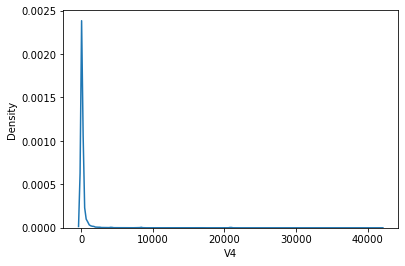

In [43]:
sns.kdeplot(train_data["V4"], bw_method=0.1)
plt.show()

In [44]:
group1 = train_data.loc[train_data['Target'] == 0, 'V4']
group2 = train_data.loc[train_data['Target'] == 1, 'V4']


In [45]:

# Normality test
stat1, p1 = shapiro(group1)
stat2, p2 = shapiro(group2)
if p1 > 0.05 and p2 > 0.05:
    print("Both groups have a normal distribution.")
else:
    print("At least one group does not have a normal distribution.")

# Equal variance test
stat, p = levene(group1, group2)
if p > 0.05:
    print("The two groups have equal variances.")
else:
    print("The two groups do not have equal variances.")

At least one group does not have a normal distribution.
The two groups do not have equal variances.


C:\Users\vikas\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [46]:
stat, p_value = mannwhitneyu(group1, group2)

# print the results
print('Mann-Whitney U test results:')
print(f'Statistic: {stat:.3f}')
print(f'p-value: {p_value:.3f}')

Mann-Whitney U test results:
Statistic: 71379042.000
p-value: 0.000


In [47]:
train_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,Target,V13
0,CUID1872,TID229526,EID2062082,485.6945,2020-03-20 22:51:30,376474,A,BA1,BB425559,PD44707,CC1,CP0,0,2020-03-21 00:00:00
1,CUID5533,TID244499,EID1459012,393.4520,2020-04-28 07:17:12,33227,A,BA4793,BB248012,PD39453,CC1,CP0,0,2020-04-28 00:00:00
2,CUID5278,TID311877,EID0,375.7500,2020-08-15 04:11:43,0,F,BA5631,BB166256,PD237664,CC1,CP0,0,NaN
3,CUID24,TID279685,EID0,6.9722,2020-06-26 01:11:42,0,C,BA7188,BB354924,PD99032,CC1,CP0,0,NaN
4,CUID449,TID104689,EID0,16.7000,2020-09-15 10:11:06,0,C,BA7236,BB354924,PD63422,CC1,CP0,0,NaN


In [48]:
train_helper_data.head()

,V1,V3,V14,V15,V16,V17,V18,V19,V20,V21
0,CUID1626,EID1390067,B170291,A,2017-11-18 05:26:58,117.167.140.162,875,1525792,77.5500,88.8100
1,CUID2932,EID397864,B170291,A,2017-11-18 05:26:59,133.193.46.52,875,471293,-25.8500,88.8100
2,CUID7230,EID315534,B1827073,B,2017-11-18 05:27:02,127.75.140.137,875,825535,79.9000,373.5000
3,CUID1588,EID1724187,B170291,A,2017-11-18 05:27:30,120.210.191.123,875,2136427,-23.5000,88.8100
4,CUID3625,EID637357,B2356022,B,2017-11-18 05:27:55,127.75.145.110,875,825535,169.2000,400.0600


In [49]:
train_helper_data.shape

(1231200, 10)

In [50]:
train_helper_data.isna().sum()

V1     0
V3     0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
dtype: int64

In [51]:
train_data.isna().sum()

V1           0
V2           0
V3           0
V4           0
V5           0
V6           0
V7           0
V8           0
V9           0
V10          0
V11          0
V12          0
Target       0
V13       1871
dtype: int64

In [52]:
train_helper_data_grouped = train_helper_data.groupby(["V1"]).agg(list)

In [53]:
train_helper_data_grouped = train_helper_data_grouped.reset_index()

In [54]:
train_helper_data_grouped["V3"] = train_helper_data_grouped["V3"].apply(lambda x: st.mode(x)[0][0])

In [55]:
train_helper_data.head()

,V1,V3,V14,V15,V16,V17,V18,V19,V20,V21
0,CUID1626,EID1390067,B170291,A,2017-11-18 05:26:58,117.167.140.162,875,1525792,77.5500,88.8100
1,CUID2932,EID397864,B170291,A,2017-11-18 05:26:59,133.193.46.52,875,471293,-25.8500,88.8100
2,CUID7230,EID315534,B1827073,B,2017-11-18 05:27:02,127.75.140.137,875,825535,79.9000,373.5000
3,CUID1588,EID1724187,B170291,A,2017-11-18 05:27:30,120.210.191.123,875,2136427,-23.5000,88.8100
4,CUID3625,EID637357,B2356022,B,2017-11-18 05:27:55,127.75.145.110,875,825535,169.2000,400.0600


In [56]:
train_helper_data_grouped["V14"] = train_helper_data_grouped["V14"].apply(lambda x: st.mode(x)[0][0])
train_helper_data_grouped["V15"] = train_helper_data_grouped["V15"].apply(lambda x: st.mode(x)[0][0])
train_helper_data_grouped["V16"] = train_helper_data_grouped["V16"].apply(lambda x: st.mode(x)[0][0])
train_helper_data_grouped["V17"] = train_helper_data_grouped["V17"].apply(lambda x: st.mode(x)[0][0])
train_helper_data_grouped["V18"] = train_helper_data_grouped["V18"].apply(lambda x: st.mode(x)[0][0])
train_helper_data_grouped["V19"] = train_helper_data_grouped["V19"].apply(lambda x: np.median(x))
train_helper_data_grouped["V20"] = train_helper_data_grouped["V18"].apply(lambda x: np.mean(x))
train_helper_data_grouped["V21"] = train_helper_data_grouped["V21"].apply(lambda x: np.mean(x))

In [57]:
train_helper_data_grouped.head()

,V1,V3,V14,V15,V16,V17,V18,V19,V20,V21
0,CUID1,EID493935,B170291,A,2018-03-11 09:44:04,121.66.147.47,875,"1,777,813.0000",875.0000,92.1693
1,CUID10,EID762550,B170291,A,2017-11-19 02:49:21,112.136.138.151,875,"1,777,813.0000",875.0000,87.3793
2,CUID100,EID1663139,B170291,A,2017-12-16 20:32:19,120.210.191.46,875,"2,136,427.0000",875.0000,86.1003
3,CUID1000,EID223654,B170291,A,2017-12-29 05:18:38,113.178.151.107,875,"809,725.0000",875.0000,97.6374
4,CUID1003,EID401592,B170291,A,2017-12-17 11:33:33,86.42.118.158,875,"33,514.0000",875.0000,82.3615


In [58]:
train_helper_data_grouped.drop(columns=["V3"], inplace=True)

In [59]:
merged_data = train_data.merge(train_helper_data_grouped, on="V1", how="left")

In [60]:
merged_data.isna().sum()

V1           0
V2           0
V3           0
V4           0
V5           0
V6           0
V7           0
V8           0
V9           0
V10          0
V11          0
V12          0
Target       0
V13       1871
V14        164
V15        164
V16        164
V17        164
V18        164
V19        164
V20        164
V21        164
dtype: int64

In [61]:
merged_data.shape

(233633, 22)

In [62]:
merged_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,Target,V13,V14,V15,V16,V17,V18,V19,V20,V21
0,CUID1872,TID229526,EID2062082,485.6945,2020-03-20 22:51:30,376474,A,BA1,BB425559,PD44707,CC1,CP0,0,2020-03-21 00:00:00,B170291,A,2018-03-11 13:01:01,127.75.58.107,875.0000,"825,535.0000",875.0000,93.2657
1,CUID5533,TID244499,EID1459012,393.4520,2020-04-28 07:17:12,33227,A,BA4793,BB248012,PD39453,CC1,CP0,0,2020-04-28 00:00:00,B170291,B,2017-12-18 00:36:55,95.60.92.198,205.0000,"468,070.0000",205.0000,119.2087
2,CUID5278,TID311877,EID0,375.7500,2020-08-15 04:11:43,0,F,BA5631,BB166256,PD237664,CC1,CP0,0,NaN,B170291,A,2018-03-11 10:25:26,121.128.85.95,875.0000,"33,514.0000",875.0000,90.3696
3,CUID24,TID279685,EID0,6.9722,2020-06-26 01:11:42,0,C,BA7188,BB354924,PD99032,CC1,CP0,0,NaN,B4995,B,2017-12-18 00:45:23,112.136.118.173,875.0000,"1,777,813.0000",875.0000,105.7284
4,CUID449,TID104689,EID0,16.7000,2020-09-15 10:11:06,0,C,BA7236,BB354924,PD63422,CC1,CP0,0,NaN,B170291,A,2017-12-18 08:45:17,66.83.174.100,875.0000,"33,514.0000",875.0000,87.1306


In [112]:
merged_data.to_csv("merged_data.csv", index=False)

In [111]:
merged_data["V17"].nunique(), merged_data["V1"].nunique()

(3662, 3684)

In [63]:
import requests

In [78]:
all_locations = []

In [79]:
def get_location(ip_address):
    if not ip_address:
        return None
    response = requests.get(f'https://ipapi.co/{ip_address}/json/').json()
    location_data = {
        "ip": ip_address,
        "city": response.get("city"),
        "region": response.get("region"),
        "country": response.get("country_name")
    }
    all_locations.append(location_data)
    return location_data


In [106]:
print(get_location('106.182.133.167'))

{'ip': '106.182.133.167', 'city': None, 'region': None, 'country': None}


In [66]:
merged_data["V17"].iloc[2]

'121.128.85.95'

In [67]:
from collections import Counter

In [68]:
merged_data["V17"].fillna("", inplace=True)

In [69]:
for i in list(merged_data["V17"].unique()):
    if type(i) == float:
        print(i)

In [70]:
all_ips = merged_data["V17"].unique().tolist()

In [71]:
len(all_ips)

3662

In [72]:
location_mapping = {}

In [73]:
from tqdm import tqdm

In [74]:
import threading

In [80]:
threads = [threading.Thread(target=get_location, args=(i,)) for i in all_ips]
    # Start the worker threads
for thread in threads:
    thread.start()
# Wait for the worker threads to finish
for thread in threads:
    thread.join()

In [81]:
all_locations

[{'ip': '127.75.58.107', 'city': None, 'region': None, 'country': None},
 {'ip': '112.136.118.173',
  'city': 'Minato-ku',
  'region': 'Tokyo',
  'country': 'Japan'},
 {'ip': '121.128.85.95',
  'city': 'Seoul',
  'region': 'Seoul',
  'country': 'South Korea'},
 {'ip': '181.125.90.55',
  'city': 'Asunción',
  'region': 'Asuncion',
  'country': 'Paraguay'},
 {'ip': '129.45.104.71',
  'city': 'Kouba',
  'region': 'Algiers',
  'country': 'Algeria'},
 {'ip': '114.101.165.155',
  'city': 'Rongcheng',
  'region': 'Anhui',
  'country': 'China'},
 {'ip': '95.60.92.198',
  'city': 'Santa Cruz de Tenerife',
  'region': 'Canary Islands',
  'country': 'Spain'},
 {'ip': '66.83.174.100',
  'city': 'Little Rock',
  'region': 'Arkansas',
  'country': 'United States'},
 {'ip': '116.109.47.161',
  'city': 'Tay Ninh',
  'region': 'Tây Ninh Province',
  'country': 'Vietnam'},
 {'ip': '144.157.199.40',
  'city': 'Indianapolis',
  'region': 'Indiana',
  'country': 'United States'},
 {'ip': '116.170.178.117',

In [84]:
cities = {location["ip"]: location["city"] for location in all_locations}
region = {location["ip"]: location["region"] for location in all_locations}
country = {location["ip"]: location["country"] for location in all_locations}

In [103]:
merged_data["city"].unique().tolist()[1]

'Santa Cruz de Tenerife'

In [95]:
merged_data[merged_data["city"] == None]["V17"]

Series([], Name: V17, dtype: object)

In [86]:
merged_data["city"] = merged_data["V17"].map(cities)

In [87]:
merged_data["region"] = merged_data["V17"].map(region)
merged_data["country"] = merged_data["V17"].map(country)

In [88]:
merged_data["city"].value_counts(dropna=False)

None           219607
Minato-ku         848
New York          753
Jinrongjie        593
Whitehall         479
                ...  
Blackwood          10
Brighton            9
Banjarmasin         7
Singida             4
Kunming             4
Name: city, Length: 151, dtype: int64

In [109]:
merged_data[merged_data["region"].isna()].shape

(219771, 25)

In [82]:
train_data.dropna(inplace=True)

In [83]:
train_data["V5"] = pd.to_datetime(train_data["V5"])
train_data["V13"] = pd.to_datetime(train_data["V13"])

In [84]:
train_data['day_diff'] = train_data.apply(lambda x: (x["V5"]-x["V13"]).days, axis=1)

In [87]:
train_data.drop(columns=["V5", "V11", "V13"], inplace=True)

In [88]:
train_data["V7"].nunique(),train_data["V8"].nunique(), train_data["V9"].nunique(), train_data["V10"].nunique(), +train_data["V12"].nunique(),

(3, 35018, 5734, 40362, 4075)

In [106]:
train_data.head()

,V1,V2,V3,V4,V6,V7,V8,V9,V10,V12,Target,day_diff
0,CUID1872,TID229526,EID2062082,485.6945,376474,A,BA1,BB425559,PD44707,CP0,0,-1
1,CUID5533,TID244499,EID1459012,393.4520,33227,A,BA4793,BB248012,PD39453,CP0,0,0
21,CUID1872,TID170983,EID1919591,50.1000,33227,A,BA11667,BB71744,PD260919,CP0,0,-1
23,CUID5790,TID15386,EID263983,122.7116,375702,B,BA12131,BB234920,PD35811,CP0,0,88
24,CUID5790,TID195552,EID1437328,123.4381,375702,B,BA12131,BB234920,PD35811,CP0,0,194


In [134]:
train_data["day_diff"].mode()

0    0
Name: day_diff, dtype: int64

In [107]:
X = train_data.drop(columns=["V1", "V2", "V3",'Target'])
y = train_data['Target']

In [108]:
cat_columns = X.select_dtypes(include=['object']).columns
cat_features_idx = [X.columns.get_loc(col) for col in cat_columns]

In [109]:
cat_features_idx

[2, 3, 4, 5, 6]

In [110]:
X.head()

,V4,V6,V7,V8,V9,V10,V12,day_diff
0,485.6945,376474,A,BA1,BB425559,PD44707,CP0,-1
1,393.4520,33227,A,BA4793,BB248012,PD39453,CP0,0
21,50.1000,33227,A,BA11667,BB71744,PD260919,CP0,-1
23,122.7116,375702,B,BA12131,BB234920,PD35811,CP0,88
24,123.4381,375702,B,BA12131,BB234920,PD35811,CP0,194


In [111]:
cat_columns

Index(['V7', 'V8', 'V9', 'V10', 'V12'], dtype='object')

In [114]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                   )

# Define model and its hyperparameters
model = CatBoostClassifier(iterations=1000, 
                           learning_rate=0.1, 
                           depth=6, 
                           l2_leaf_reg=3, 
                           loss_function='Logloss', 
                           random_seed=42,
                          cat_features=cat_features_idx)

# Train model on training data
model.fit(X_train, y_train, 
          eval_set=(X_test, y_test), 
          verbose=100, 
          early_stopping_rounds=50)



0:	learn: 0.4509418	test: 0.4514078	best: 0.4514078 (0)	total: 436ms	remaining: 7m 15s
100:	learn: 0.0061912	test: 0.0038196	best: 0.0038160 (91)	total: 30.4s	remaining: 4m 30s
200:	learn: 0.0055020	test: 0.0037309	best: 0.0037263 (189)	total: 1m	remaining: 4m
300:	learn: 0.0051225	test: 0.0036815	best: 0.0036815 (300)	total: 1m 30s	remaining: 3m 31s
400:	learn: 0.0047384	test: 0.0035976	best: 0.0035901 (395)	total: 2m 2s	remaining: 3m 2s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.00359009247
bestIteration = 395

Shrink model to first 396 iterations.


In [115]:

# Evaluate model on testing data
score = model.score(X_test, y_test)
print(f"Accuracy on testing data: {score}")

Accuracy on testing data: 0.999072336202619


In [116]:
y_pred = model.predict(X_test)

In [122]:
from sklearn.metrics import classification_report, precision_recall_curve, auc

In [119]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     46086
           1       0.94      0.90      0.92       267

    accuracy                           1.00     46353
   macro avg       0.97      0.95      0.96     46353
weighted avg       1.00      1.00      1.00     46353



In [121]:
precision, recall, thrs = precision_recall_curve(y_test, y_pred)

In [123]:
max(0, 100 * auc(precision, recall))

91.271930055798

In [124]:
test_data = pd.read_csv("../dataset/test.csv")

In [125]:
test_data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13'],
      dtype='object')

In [127]:
X_train.columns

Index(['V4', 'V6', 'V7', 'V8', 'V9', 'V10', 'V12', 'day_diff'], dtype='object')

In [129]:
test_data.isna().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13    2761
dtype: int64

In [131]:
import numpy as np

In [132]:
test_data.fillna(np.nan, inplace=True)

In [135]:
test_data["V5"] = pd.to_datetime(test_data["V5"])
test_data["V13"] = pd.to_datetime(test_data["V13"])

In [136]:
test_data["day_diff"] = test_data.apply(lambda x: (x["V5"]-x["V13"]).days, axis=1)

In [137]:
test_data["day_diff"].isna().sum()

2761

In [138]:
test_data["day_diff"].fillna(0, inplace=True)

In [139]:
result = test_data[['V2','V4', 'V6', 'V7', 'V8', 'V9', 'V10', 'V12', 'day_diff']]

In [142]:
Target = model.predict(result.drop(columns=["V2"], axis=1))

In [143]:
Probability = model.predict_proba(result.drop(columns=["V2"], axis=1))

In [145]:
Target

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [146]:
Probability = [max(i) for i in Probability]

In [147]:
Probability

[0.9962433159525785,
 0.998649705162295,
 0.9984994843760882,
 0.9983698762120967,
 0.9962433159525785,
 0.9962433159525785,
 0.9987903560324966,
 0.9962433159525785,
 0.9962433159525785,
 0.9983698762120967,
 0.9963043954121742,
 0.9999975250171901,
 0.9954728628976817,
 0.978533452966895,
 0.9779041677189003,
 0.9779041677189003,
 0.9906232267998347,
 0.9783121637193742,
 0.9827167631280231,
 0.9854221161300296,
 0.9838228898213542,
 0.9854221161300296,
 0.9827167631280231,
 0.9854221161300296,
 0.9854221161300296,
 0.9830423725004721,
 0.9896842142222365,
 0.9779167742247413,
 0.9805710325157391,
 0.992769378948794,
 0.9739153498233957,
 0.9739153498233957,
 0.9845020379496846,
 0.9906414395751967,
 0.9906414395751967,
 0.9679073776901493,
 0.9992915525170007,
 0.981674375429076,
 0.9865874318664332,
 0.9926292281145985,
 0.9824754429287641,
 0.9824754429287641,
 0.9663449163979744,
 0.9913016500186849,
 0.9834457918764512,
 0.9855770142526422,
 0.9785774401949929,
 0.97896109805956

In [149]:
output = pd.DataFrame({"V2":result["V2"], "Probability": Probability, "Target": Target})

In [150]:
output.to_csv("result.csv", index=False)

In [151]:
output.shape

(215852, 3)

In [12]:
import pandas as pd

# Create the first dataframe
df1 = pd.DataFrame({'id': ['A', 'B', 'C', 'D'], 'col1': ['X', 'Y', 'Z', 'W'], 'col2': ['P', 'Q', 'R', 'S']})

# Create the second dataframe
df2 = pd.DataFrame({'id': ['A', 'B', 'C', 'D'], 'col3': ['M', 'N', 'O', 'P'], 'col4': ['Q', 'R', 'S', 'T']})

# Create the third dataframe with the target labels
df3 = pd.DataFrame({'id': ['A', 'B', 'C', 'D'], 'target': [0, 1, 1, 0]})

# Merge the dataframes
merged_df = pd.merge(df1, df2, on=['col1', 'col2'], how='outer')
merged_df = pd.merge(merged_df, df3, on='id')

# Display the merged dataframe
print(merged_df)


KeyError: 'col1'